# Data Visualization

This notebook is about the basic visualization capabilities of the matplotlib and plotly packages. Although there are more visualization packages available, matplotlib has established itself as the benchmark and, in many situations, a robust and reliable visualization tool.

It is both easy to use for standard plots and flexible when it comes to more complex plots and customizations. In addition, it is tightly integrated with NumPy and pandas and the data structures they provide.

matplotlib only allows for the generation of plots in the form of bitmaps (for example, in PNG or JPG format). On the other hand, modern web technologies—based, for example, on the Data-Driven Documents (D3.js) standard—allow for nice interactive and also embeddable plots (interactive, for example, in that one can zoom in to inspect certain areas in greater detail).



## Static 2D Plotting


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

## One-Dimensional Data Sets

The most fundamental, but nevertheless quite powerful, plotting function is ```plt.plot()```

In principle, it needs two sets of numbers:

* **x values**
A list or an array containing the x coordinates (values of the abscissa)

* **y values**
A list or an array containing the y coordinates (values of the ordinate)

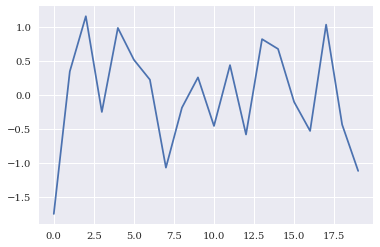

In [ ]:
import numpy as np

np.random.seed(100)
y = np.random.standard_normal(20) # Draws the random numbers
x = np.arange(len(y)) # Fixes the integers (x values)

plt.plot(x, y)

plt.plot() notices when an ndarray object is passed. In this case, there is no need to
provide the “extra” information of the x values. If one only provides the y values,
plt.plot() takes the index values as the respective x values. Therefore, the following
single line of code generates exactly the same output


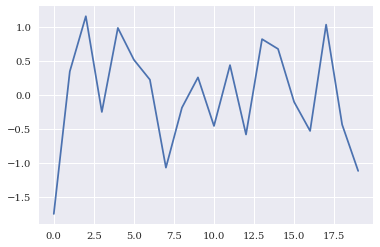

In [ ]:
plt.plot(y)

(-0.9500000000000001, 19.95, -1.9113960852748242, 1.6444773835679647)

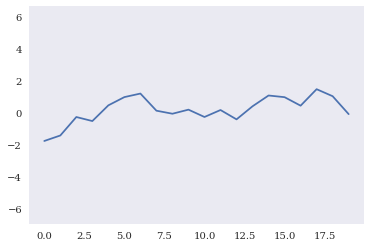

In [ ]:
# Add some different stylings to the chart
plt.plot(y.cumsum())
plt.grid(False)
plt.axis('equal')

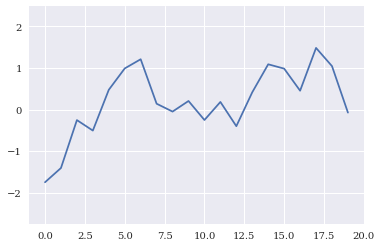

In [ ]:
#In addition, one can directly set the minimum and maximum values of each axis by using plt.xlim() and plt.ylim().
plt.plot(y.cumsum())
plt.xlim(-1, 20)
plt.ylim(np.min(y.cumsum()) - 1,
          np.max(y.cumsum()) + 1);

For the sake of better readability, a plot usually contains a number of labels—e.g., a
title and labels describing the nature of the x and y values. These are added by the
functions plt.title(), plt.xlabel(), and plt.ylabel(), respectively. By default,
plot() plots continuous lines, even if discrete data points are provided. The plotting
of discrete points is accomplished by choosing a different style option. 

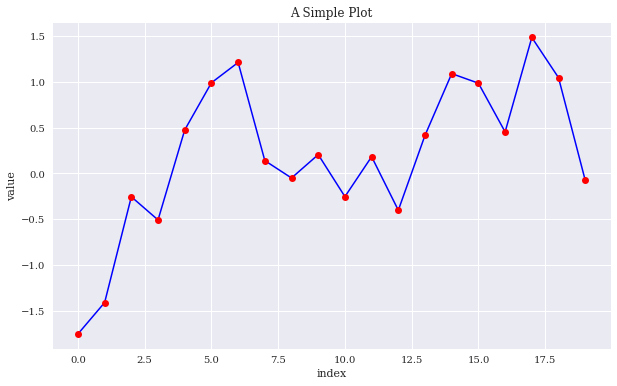

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y.cumsum(), 'b', lw=1.5)
plt.plot(y.cumsum(), 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot');

## Two-Dimensional Data Set

Plotting one-dimensional data can be considered a special case. In general, data sets will consist of multiple separate subsets of data. 

The handling of such data sets follows the same rules with matplotlib as with one-dimensional data. However, a number of additional issues might arise in such a context. 

For example, two data sets might have such a different scaling that they cannot be plotted using the same yand/or x-axis scaling. Another issue might be that one might want to visualize two different data sets in different ways, e.g., one by a line plot and the other by a bar plot.

The following code generates a two-dimensional sample data set as a NumPy ndarray object of shape 20 × 2 with standard normally distributed pseudo-random numbers.

On this array, the method cumsum() is called to calculate the cumulative sum of the sample data along axis 0 (i.e., the first dimension):

```y = np.random.standard_normal((20, 2)).cumsum(axis=0)```

In general, one can also pass such two-dimensional arrays to plt.plot(). It will then automatically interpret the contained data as separate data sets (along axis 1, i.e., the
second dimension).

Text(0.5, 1.0, 'A Simple Plot')

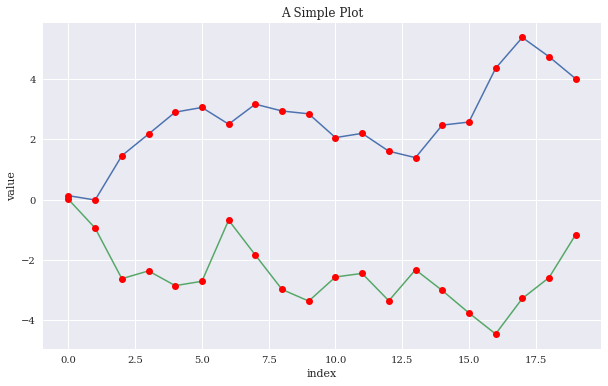

In [ ]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(y, lw=1.5)
plt.plot(y, 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

```plt.legend()``` accepts different locality parameters. 0 stands for best location, in the
sense that as little data as possible is hidden by the legend.
This next example shows the plot of the two data sets, this time with a legend. In the generating code, the ndarray object is not passed as a whole but the two data subsets (```y[:,
0]``` and ```y[:, 1]```) are accessed separately, which allows you to attach individual labels
to them:

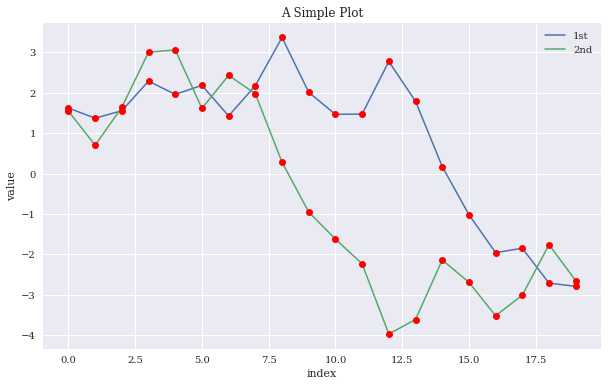

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot');

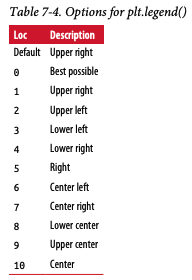

Multiple data sets with a similar scaling, like simulated paths for the same financial
risk factor, can be plotted using a single y-axis. However, often data sets show rather
different scalings and the plotting of such data with a single y-scale generally leads to
a significant loss of visual information. The following example introduces a second y-axis to the plot. The chart now has
two different y-axes. The left y-axis is for the first data set while the right y-axis is for
the second. Consequently, there are also two legends:


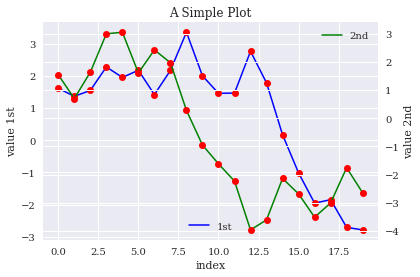

In [ ]:
# By using the plt.subplots() function, one gets direct access to the underlying 
# plotting objects (the figure, subplots, etc.). It allows one, for example, to generate
# a second subplot that shares the x-axis with the first subplot
fig, ax1 = plt.subplots()
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=8)
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
ax2 = ax1.twinx() # Creates a second axis object that shares the x-axis
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd');

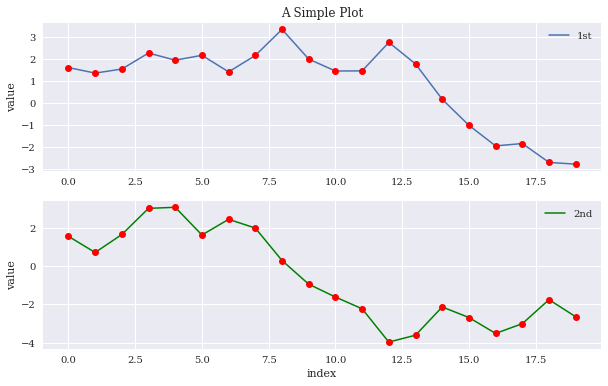

In [ ]:
# Next let's take a look at two separate subplots
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.ylabel('value')
plt.title('A Simple Plot')
plt.subplot(212)
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')

The placing of subplots in a matplotlib figure object is accomplished by the use of a
special coordinate system. plt.subplot() takes as arguments three integers for
numrows, numcols, and fignum (either separated by commas or not). numrows specifies the number of rows, numcols the number of columns, and fignum the number of
the subplot, starting with 1 and ending with numrows * numcols. For example, a figure with nine equally sized subplots would have numrows=3, numcols=3, and fig
num=1,2,...,9.
The lower-right subplot would have the following “coordinates”:
plt.subplot(3, 3, 9).

Sometimes, it might be necessary or desired to choose two different plot types to vis‐
ualize such data. With the subplot approach one has the freedom to combine arbi‐
trary kinds of plots that matplotlib offers

Text(0.5, 1.0, '2nd Data Set')

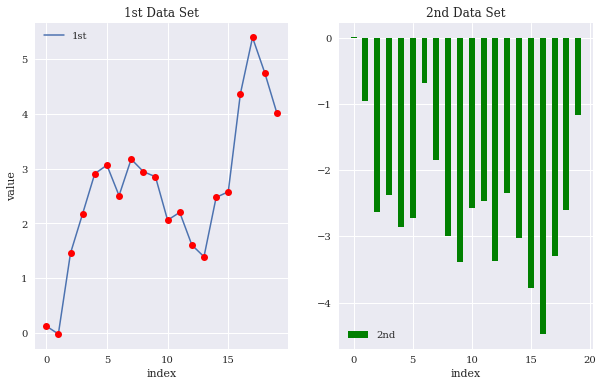

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st Data Set')
plt.subplot(122)
plt.bar(np.arange(len(y)), y[:, 1], width=0.5,
color='g', label='2nd')
plt.legend(loc=0)
plt.xlabel('index')
plt.title('2nd Data Set')

## Other Plot Styles

When it comes to two-dimensional plotting, line and point plots are probably the most important ones in finance; this is because many data sets embody time series data, which generally is visualized by such plots. 

In the future we will addresses financial time series data in detail. However, this notebook sticks with a two-dimensional data set of random numbers and illustrates some alternative, and for financial applications useful, visualization approaches. 

The first is the scatter plot, where the values of one data set serve as the x values for the other data set. 

Text(0.5, 1.0, 'Scatter Plot')

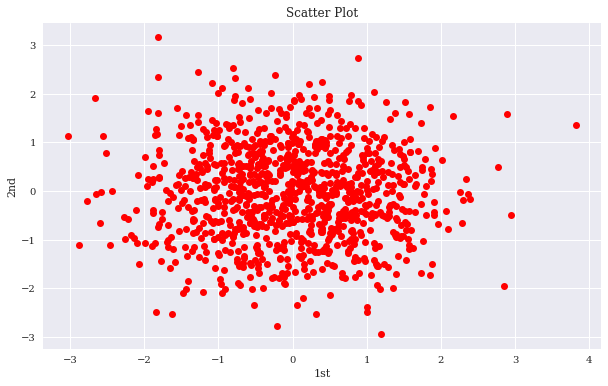

In [ ]:
y = np.random.standard_normal((1000,2))

plt.figure(figsize=(10,6))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')


Text(0.5, 1.0, 'Scatter Plot')

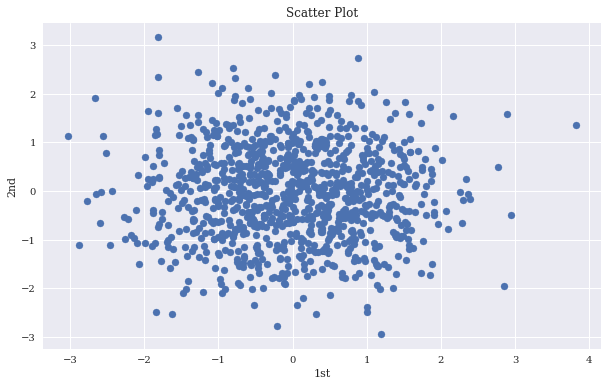

In [ ]:
# Matplotlib also provides a specific function to generate scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

Among other things, the plt.scatter() plotting function allows the addition of a
third dimension, which can be visualized through different colors and be described
by the use of a color bar. Next we will show a scatter plot where there is a third
dimension illustrated by different colors of the single dots and with a color bar as a
legend for the colors. To this end, the following code generates a third data set with
random data, this time consisting of integers between 0 and 10:

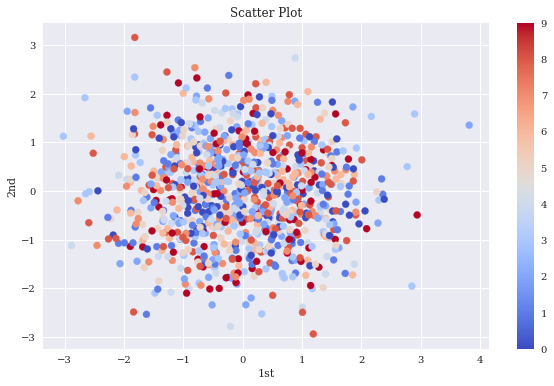

In [ ]:
c = np.random.randint(0, 10, len(y))

plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], c= c, cmap='coolwarm', marker='o')
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot');

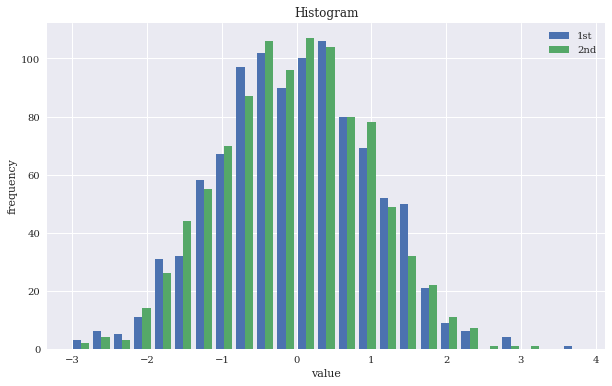

In [ ]:
# Another type of plot is the histogram
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=25)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

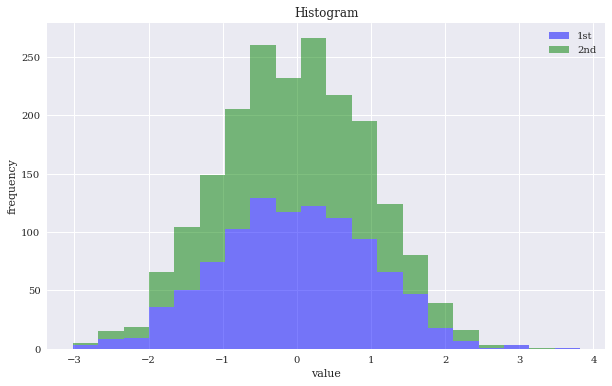

In [ ]:
# Or a stacked histogram
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'], stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

Text(0.5, 1.0, 'Boxplot')

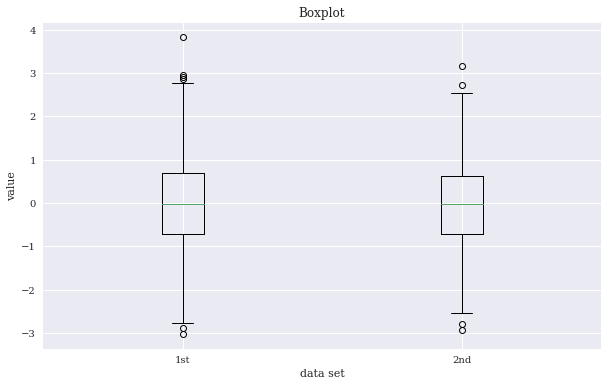

In [ ]:
# Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

## Static 3D Plotting
There are not too many fields in finance that really benefit from visualization in three
dimensions. However, one application area is volatility surfaces showing implied volatilities simultaneously for a number of times-to-maturity and strikes of the traded
options used. 
In what follows, the code artificially generates a
plot that resembles a volatility surface. To this end, consider the parameters:
* Strike values between 50 and 150
* Times-to-maturity between 0.5 and 2.5 years

This provides a two-dimensional coordinate system. The NumPy np.meshgrid() function can generate such a system out of two one-dimensional ndarray objects:

In [ ]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
strike[:2].round(1) #The 2d ndarray objects (grids) created

array([[ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ],
       [ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ]])

In [ ]:
iv = (strike - 100) ** 2 / (100 * strike) / ttm # The dummy implied volatility values
iv[:5, :3]

array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

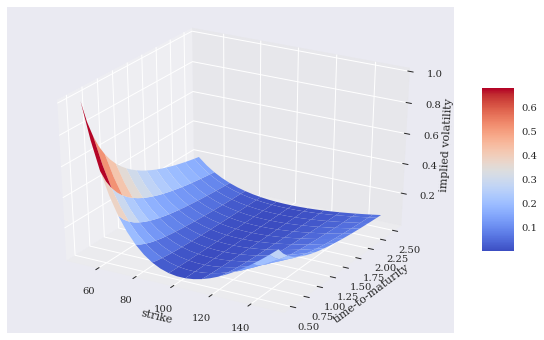

In [ ]:
 from mpl_toolkits.mplot3d import Axes3D # Imports 3D plotting features

 fig = plt.figure(figsize=(10, 6))
 ax = fig.gca(projection='3d')  # Sets up a canvas for 3D plotting
 surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                        cmap=plt.cm.coolwarm, linewidth=0.5,
                        antialiased=True) # Creates the 3d plot
 ax.set_xlabel('strike') 
 ax.set_ylabel('time-to-maturity')
 ax.set_zlabel('implied volatility')
 fig.colorbar(surf, shrink=0.5, aspect=5)

# Interactive 2D Plotting

matplotlib allows you to create plots that are static bitmap objects or of PDF format. Nowadays, there are many libraries available to create interactive plots based on the D3.js standard. Such plots enable zooming in and out, hover effects for data inspection, and more.

They can in general also be easily embedded in web pages. A popular platform and plotting library is plotly. It is dedicated to visualization for data science and is in widespread use in the data science community. 

Major benefits of plotly are its tight integration with the Python ecosystem and the ease of use—in particular when combined with pandas DataFrame objects and the wrapper package Cufflinks. For some functionality, a free account is required. Once the credentials are granted they should be stored locally for permanent use.


## Basic Plots



In [2]:
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo
import numpy as np

%matplotlib inline

plyo.init_notebook_mode(connected=True)

a = np.random.standard_normal((250 ,5)).cumsum(axis=0) # The standard normally distributed pseudo-random numbers
index = pd.date_range('2019-1-1', freq='B', periods=len(a)) # The start date, frequency and number of periods for the DatetimeIndex object.

df = pd.DataFrame(100 + 5 * a, columns=list('abcde'), index=index) # A Linear transform of the raw data
df.head() 


,a,b,c,d,e
2019-01-01,101.579333,94.858253,101.782941,102.416630,96.457283
2019-01-02,95.637780,87.413951,104.145909,94.621621,95.769784
2019-01-03,89.407109,90.570440,102.616463,88.426136,94.608424
2019-01-04,89.638109,87.950477,100.460718,82.709215,99.533832
2019-01-07,86.150702,83.165040,101.364490,81.571601,101.300049


Cufflinks adds a new method to the DataFrame class: ```df.iplot()```. This method uses
plotly in the backend to create interactive plots. The code examples in this section
all make use of the option to download the interactive plot as a static bitmap, which
in turn is embedded in the text. In the Jupyter Notebook environment, the created
plots are all interactive.

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

plyo.iplot(
    df.iplot(asFigure=True),
    image='png',
    filename='ply_01'
)

In [ ]:
plyo.iplot( df[['a', 'b']].iplot(asFigure=True,
                                 theme='polar',
                                 title='A Time Series Plot',
                                 xTitle='date',
                                 yTitle='value',
                                 mode={'a': 'markers', 'b': 'lines+markers'},
                                 symbol={'a': 'circle', 'b': 'diamond'},
                                 size=3.5,
                                 colors={'a': 'blue', 'b': 'magenta'},
                                 ), image='png',filename='ply_02' )

Similar to matplotlib, plotly allows for a number of different plotting types. Plot‐
ting types available via Cufflinks are chart, scatter, bar, box, spread, ratio, heatmap, surface, histogram, bubble, bubble3d, scatter3d, scattergeo, ohlc, candle,
pie, and choropleth. As an example of a plotting type different from a line plot, consider the histogram

In [ ]:
plyo.iplot(
    df.iplot(kind='hist',
    subplots=True,
    bins=15,
    asFigure=True),
    image='png',
    filename='ply_03'
 )

# Financial Plots

The combination of plotly, Cufflinks, and pandas proves particularly powerful when working with financial time series data. Cufflinks provides specialized functionality to create typical financial plots and to add typical financial charting elements, such as the Relative Strength Index (RSI). To this end, a persistent QuantFig object is created that can be plotted the same way as a DataFrame object with Cufflinks.

This subsection uses a real financial data set, time series data for the EUR/USD exchange rate

In [4]:
eur_usd_url = 'https://raw.githubusercontent.com/yhilpisch/py4fi/master/jupyter36/source/fxcm_eur_usd_eod_data.csv'
raw = pd.read_csv(eur_usd_url)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2820 non-null   object 
 1   Time        2820 non-null   object 
 2   OpenBid     2820 non-null   float64
 3   HighBid     2820 non-null   float64
 4   LowBid      2820 non-null   float64
 5   CloseBid    2820 non-null   float64
 6   OpenAsk     2820 non-null   float64
 7   HighAsk     2820 non-null   float64
 8   LowAsk      2820 non-null   float64
 9   CloseAsk    2820 non-null   float64
 10  TotalTicks  2820 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 242.5+ KB


In [5]:
quotes = raw[['OpenAsk', 'HighAsk', 'LowAsk', 'CloseAsk', 'Date']] # Select 5 columns
quotes = quotes.iloc[-60:] # Only a few data rows are used for visualization
quotes.set_index('Date', inplace=True)
quotes.tail()


,OpenAsk,HighAsk,LowAsk,CloseAsk
Date,,,,
5/27/2017,1.11808,1.11808,1.11743,1.11788
5/28/2017,1.11788,1.11906,1.11626,1.11660
5/29/2017,1.11660,1.12064,1.11100,1.11882
5/30/2017,1.11882,1.12530,1.11651,1.12434
5/31/2017,1.12434,1.12574,1.12027,1.12133


In [16]:
qf = cf.QuantFig(
    quotes,
    title='EUR/USD Exchange Rate',
    legend = 'top',
    name = 'EUR/USD'
)
plyo.iplot(
    qf.iplot(asFigure=True)
)

In [17]:
# Adding typical financial charting elements, such as Bollinger bands, is possible via
# different methods available for the QuantFig object
qf.add_bollinger_bands(periods=15, boll_std=2)
plyo.iplot(qf.iplot(asFigure=True), image='png', filename='qf_02')

In [18]:
# Certain financial indicators, such as RSI, may be added as a subplot
qf.add_rsi(periods=14, showbands=False)
plyo.iplot(qf.iplot(asFigure=True))